In [ ]:
# Code from: https://github.com/anantshah200/ElFarol

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import statistics as st

In [2]:
N = 100
iterations = 500
num_strategies = 20
memory = 10

In [3]:
strategies = 1 - 2*np.random.rand(N,memory,num_strategies)
#strategies = np.random.rand(N,memory,num_strategies)
biases = np.random.rand(N,num_strategies)

data = np.random.randint( 0, N, size = 2 * memory )
data = np.reshape(data,(data.shape[0],1))

history = np.zeros(( N, memory, num_strategies ))
best_s = np.zeros( N, dtype = int )
m_pred = np.zeros((N,memory,num_strategies))

In [ ]:
for i in range(memory,2*memory):
    curr_data = np.reshape(data[i-memory:i],(data[i-memory:i].shape[0],1))
    for j in range( N ):
        m_pred[j][i-memory] = np.sum(strategies[j]*curr_data,axis=0,keepdims=True) + N*biases[j]

for j in range( N ):
    diff = abs(curr_data-m_pred[j])
    error = np.argmin(np.sum(diff,axis=0))
    best_s[j] =  error 

for i in tqdm(range(iterations)):
    count = 0
    curr_data = data[-memory:]
    for j in range(N):
        a = np.sum(strategies[j,:,best_s[j]]*curr_data) + N*biases[j,best_s[j]]
        if a<=0.6*N:
            count += 1
    data = np.append(data,[count])
    for k in range(memory+i+1,2*memory+i+1):
        temp_data = np.reshape(data[k-memory:k],(data[k-memory:k].shape[0],1))
        for j in range(N):
            m_pred[j][k-memory-i-1] = np.sum(strategies[j]*temp_data,axis=0,keepdims=True) + N*biases[j]
    for j in range( N ):
        error = np.argmin(np.sum(abs(temp_data-m_pred[j]),axis=0))
        best_s[j] =  error 

100%|██████████| 500/500 [00:08<00:00, 61.21it/s]


In [5]:
mean = 0.6 * N  * np.ones_like( data )
mean_data = np.mean(data[2*memory:])



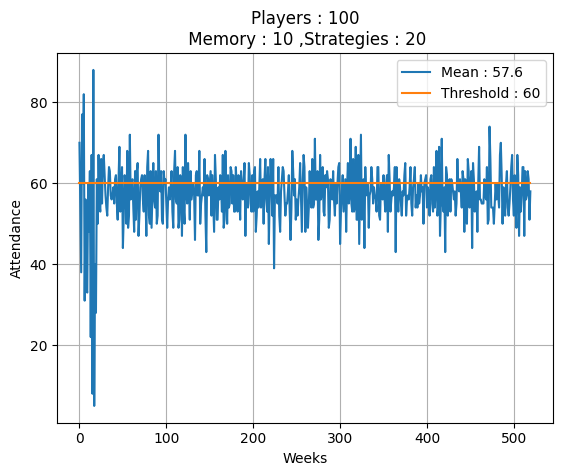

In [6]:
plt.plot( data )
plt.plot( mean )
plt.legend(['Mean : '+str(mean_data),'Threshold : 60'])
plt.xlabel("Weeks")
plt.ylabel("Attendance")
plt.grid()
plt.title("Players : "+str(N)+"\n Memory : "+str(memory)+" ,Strategies : "+str(num_strategies))
plt.show()